In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df_patient = pd.read_csv('./data_set/patient.csv')

In [3]:
df_patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [4]:
daily_count = df_patient.groupby('confirmed_date').patient_id.count()
daily_count = pd.DataFrame(daily_count)
data = daily_count.cumsum()

In [5]:
data.head()

,patient_id
confirmed_date,
2020-01-20,1
2020-01-24,2
2020-01-26,3
2020-01-27,4
2020-01-30,7


In [6]:
dataset = data.iloc[14:]
dataset.head()

,patient_id
confirmed_date,
2020-02-18,38
2020-02-19,65
2020-02-20,103
2020-02-21,203
2020-02-22,432


In [7]:
# MLP multi-perceptron

In [8]:
days_in_future = 3
dates = pd.date_range('2020-2-18','2020-3-10')
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
# future_forcast #3일을 추가해서 = 47일까지 미래 3일의 그래프를 그려본다.

days = np.array([i for i in range(len(dates))]).reshape(-1, 1) # index -> ndarray
data = np.array(dataset).reshape(-1, 1) # count->ndarray

In [9]:
dataset.columns

Index(['patient_id'], dtype='object')

In [10]:
dataset.columns= ['Confirmed']

In [11]:
dataset.head()

,Confirmed
confirmed_date,
2020-02-18,38
2020-02-19,65
2020-02-20,103
2020-02-21,203
2020-02-22,432


In [12]:
len(dataset)

22

In [13]:
data = np.array(dataset).reshape(-1, 1) # count->ndarray

In [14]:
data

array([[  38],
       [  65],
       [ 103],
       [ 203],
       [ 432],
       [ 601],
       [ 832],
       [ 975],
       [1262],
       [1766],
       [2337],
       [3149],
       [4211],
       [4811],
       [5327],
       [5765],
       [6283],
       [6766],
       [7133],
       [7381],
       [7512],
       [7754]], dtype=int64)

In [15]:
train_data = dataset[:len(dataset)-6]
test_data = dataset[len(dataset)-6:]

In [16]:
x = days[:16] # train test split
y = train_data.values
test = days[16:]

In [17]:
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15]])

In [18]:
y

array([[  38],
       [  65],
       [ 103],
       [ 203],
       [ 432],
       [ 601],
       [ 832],
       [ 975],
       [1262],
       [1766],
       [2337],
       [3149],
       [4211],
       [4811],
       [5327],
       [5765]], dtype=int64)

In [19]:
test

array([[16],
       [17],
       [18],
       [19],
       [20],
       [21]])

In [20]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[20, 10, 10, 5], max_iter=20000, random_state=42)
MLP = model.fit(x, y)

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [21]:
pred_MLP = model.predict(test)
pred_MLP

array([6508.94470306, 7111.12574225, 7713.30678143, 8315.48782062,
       8917.66885981, 9519.84989899])

In [22]:
# LSTM

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input =3
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

In [27]:
lstm_model = Sequential()
lstm_model.add(LSTM(19, activation='relu', input_shape = (n_input, n_features)))
lstm_model.add(Dense(10))
lstm_model.add(Dense(5))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 19)                1596      
_________________________________________________________________
dense (Dense)                (None, 10)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [28]:
lstm_model.fit_generator(generator, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
13/13 [==============================] - 1s 105ms/step - loss: 0.3146
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.2363
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.1870
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 0.1495
Epoch 5/20
13/13 [==============================] - 0s 12ms/step - loss: 0.1294
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1064
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0950
Epoch 8/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0884
Epoch 9/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0832
Epoch 10/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0774
Epoch 11/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0743
Epoch 12/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0

In [29]:
lstm_model.history.history.keys()

dict_keys(['loss'])

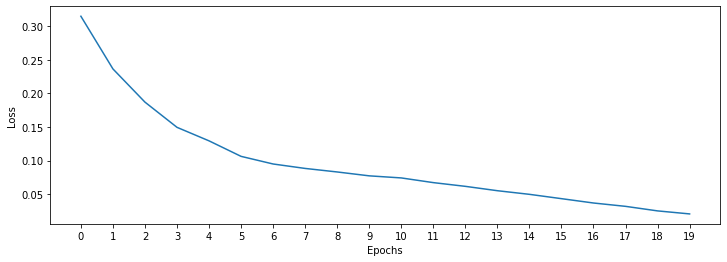

In [30]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [31]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [32]:
lstm_predictions_scaled

[array([1.0452137], dtype=float32),
 array([1.1239812], dtype=float32),
 array([1.2027209], dtype=float32),
 array([1.2859118], dtype=float32),
 array([1.3872429], dtype=float32),
 array([1.5033288], dtype=float32)]

In [33]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled) # 열로 넣어줘야 시각화 할수 있음
lstm_predictions

array([[6023.93885612],
       [6475.04054666],
       [6925.98248267],
       [7402.41686988],
       [7982.74016416],
       [8647.56403875]])

In [34]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Confirmed,LSTM_Predictions
confirmed_date,,
2020-03-05,6283,6023.938856
2020-03-06,6766,6475.040547
2020-03-07,7133,6925.982483
2020-03-08,7381,7402.416870
2020-03-09,7512,7982.740164
2020-03-10,7754,8647.564039


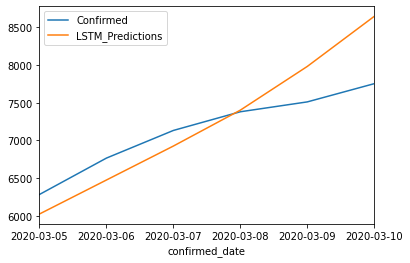

In [35]:
test_data.plot()

In [38]:
print('MAE of LSTM Model ',
      mean_absolute_error(test_data['Confirmed'],
                          test_data['LSTM_Predictions']))
print('MSE of LSTM Model ',
      mean_squared_error(test_data['Confirmed'],
                         test_data['LSTM_Predictions']))

MAE of LSTM Model  357.1265312234559
MSE of LSTM Model  202523.00134334015
